## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### No missing values present in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
# checking for duplicated records
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [8]:
## segregating numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [9]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [10]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [11]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [12]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [13]:
df['price'].mean()

np.float64(3969.1554142364894)

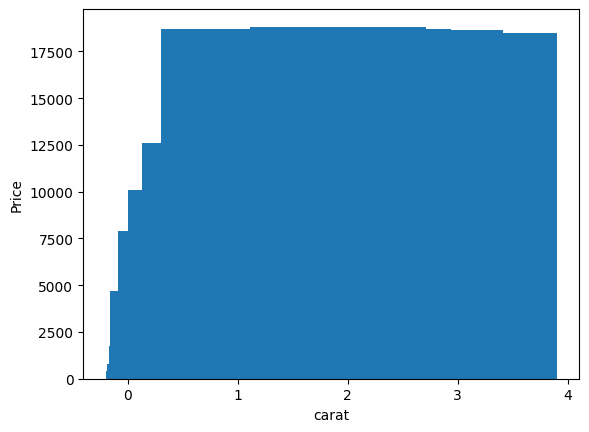

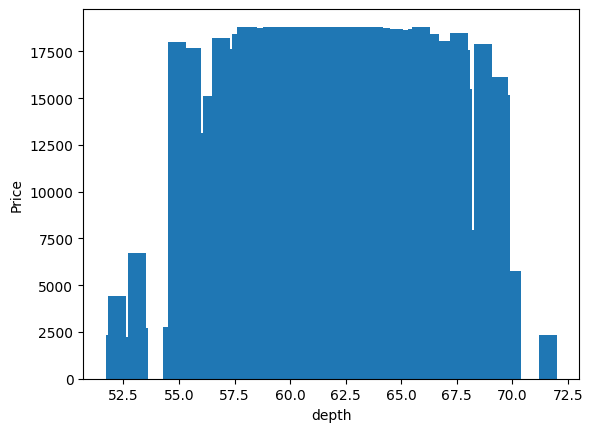

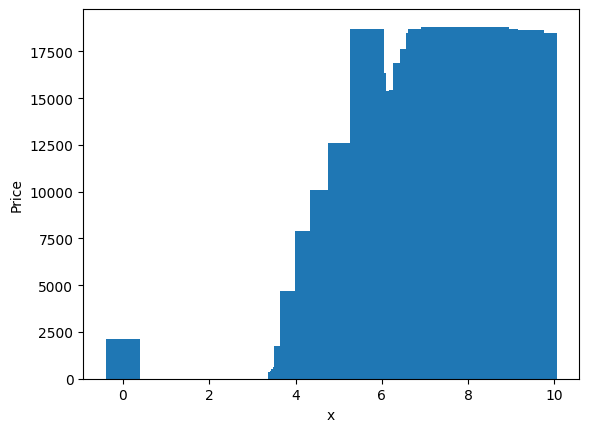

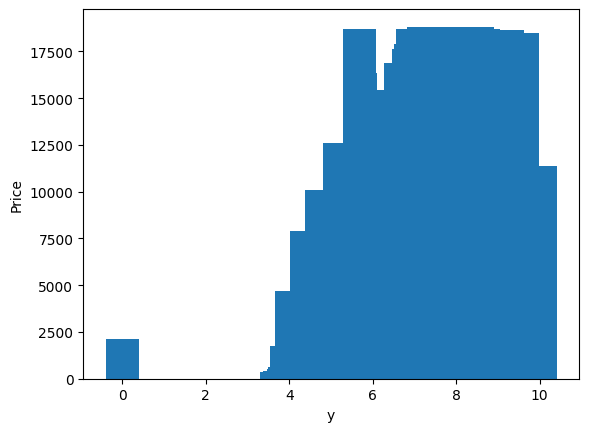

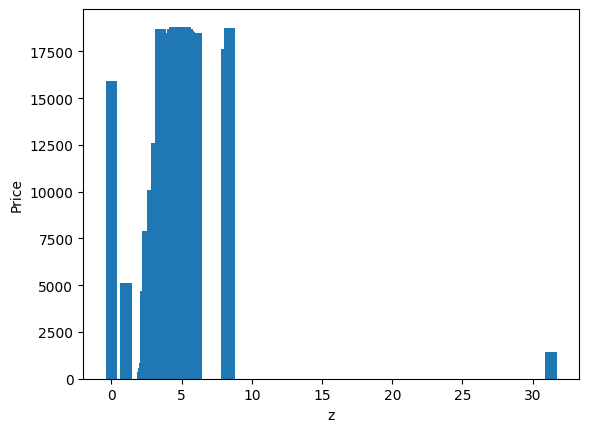

In [14]:
val=['carat','depth','x','y','z']
for i in val:
    plt.bar(df[i],df['price'])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.show()

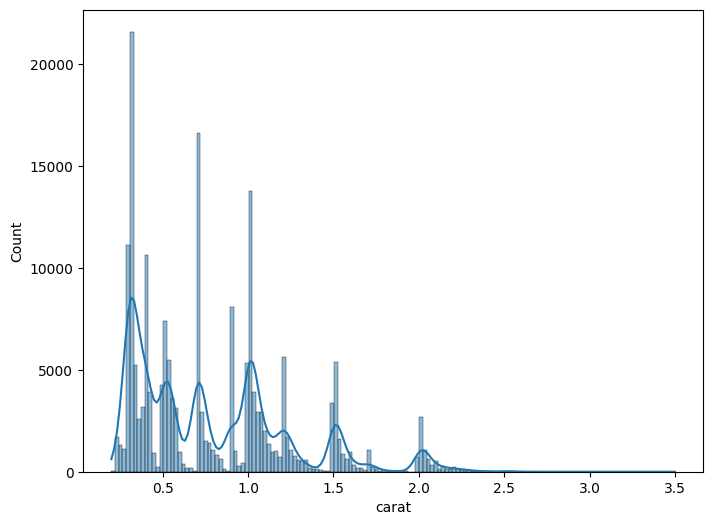

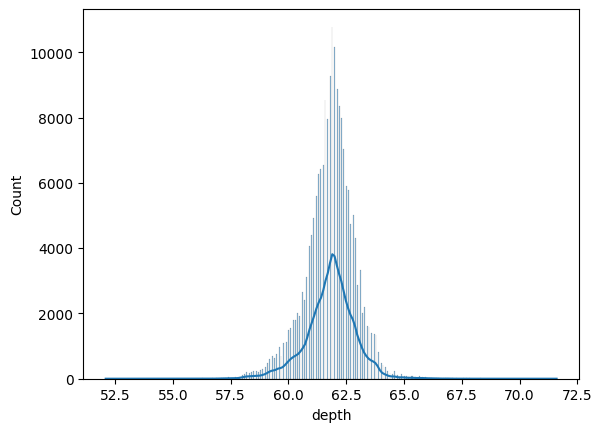

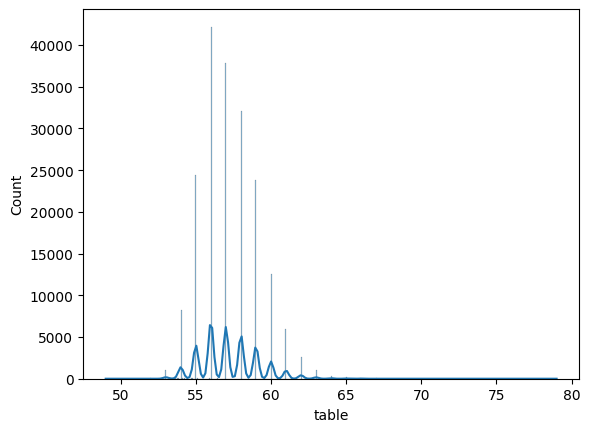

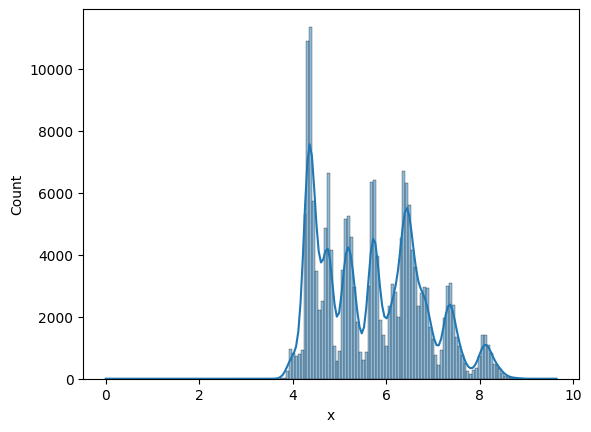

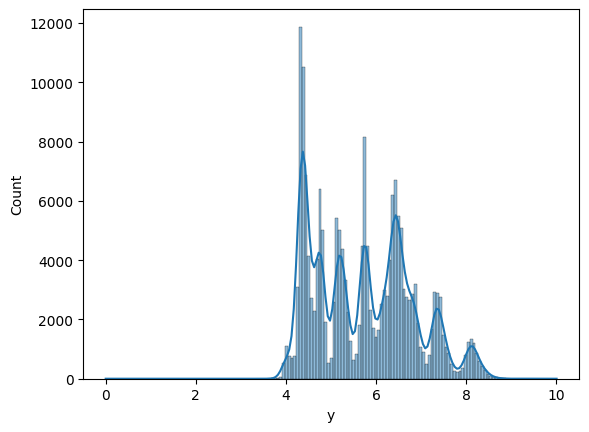

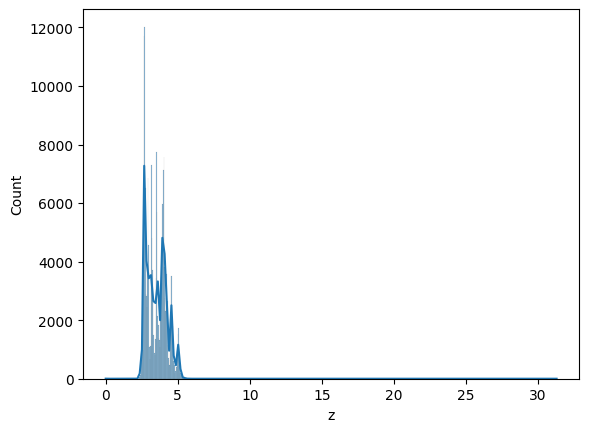

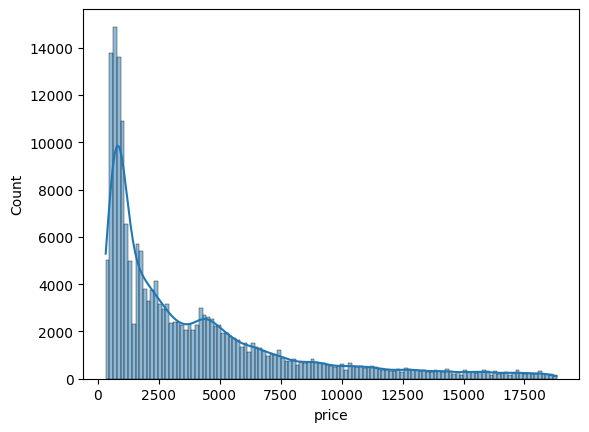

In [15]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

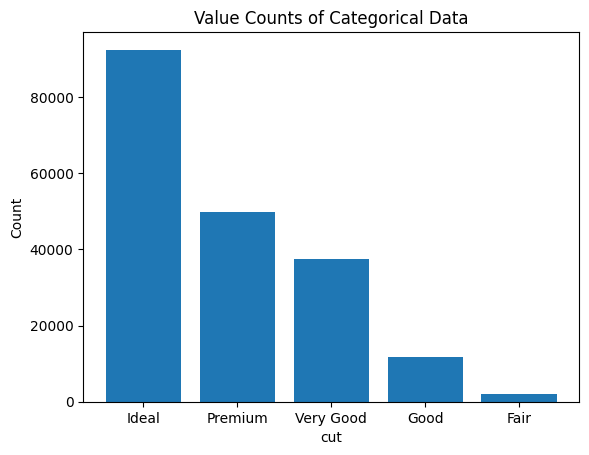

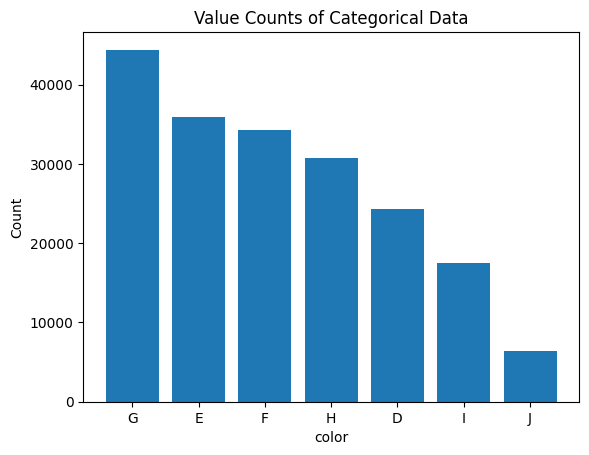

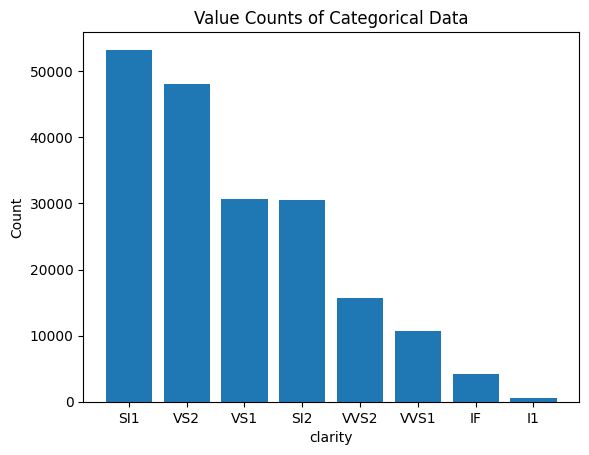

In [16]:
for i in categorical_columns:
    value_counts = df[i].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Value Counts of Categorical Data')
    plt.show()

<Axes: >

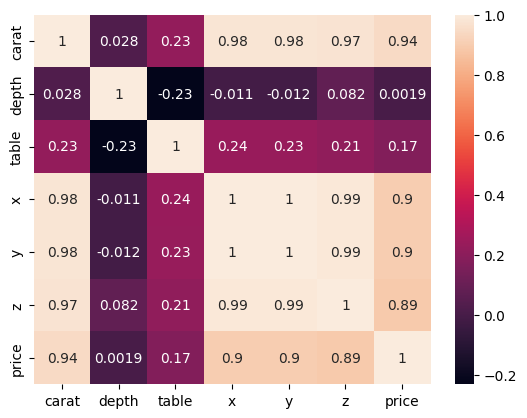

In [17]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/

In [18]:
## Independent and dependent features
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [19]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [20]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [48]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [49]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [50]:
preprocessor

,transformers,"[('num_pipeline', ...), ('cat_pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [51]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [52]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [53]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,0.874076,1.528722,1.352731
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,-2.144558,-0.935071,-0.646786
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,-0.132136,0.296826,0.686225
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,-0.132136,0.296826,0.019720
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,0.874076,2.144670,1.352731


In [54]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [55]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [56]:
## Train multiple models
## Model Ecaluation
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 1013.9047094344004
MAE: 674.0255115796836
R2 score 93.68908248567512


Lasso
Model Training Performance
RMSE: 1013.8784226767013
MAE: 675.071692336216
R2 score 93.68940971841704


Ridge
Model Training Performance
RMSE: 1013.9059272772735
MAE: 674.0555800810874
R2 score 93.68906732505802


Elasticnet
Model Training Performance
RMSE: 1533.416245606405
MAE: 1060.736875915473
R2 score 85.56494831165182


DecisionTreeRegressor
Model Training Performance
RMSE: 840.6184359919835
MAE: 423.9388890802222
R2 score 95.66193510789152


AdaBoostRegressor
Model Training Performance
RMSE: 1563.9727134967209
MAE: 1223.5073553060263
R2 score 84.98392023282007


GradientBoostingRegressor
Model Training Performance
RMSE: 617.5400338786212
MAE: 331.92018386214767
R2 score 97.6588542180831




In [57]:
best_model_index = np.argmax(r2_list)
best_model_name = model_list[best_model_index]
best_r2_score = r2_list[best_model_index]
print(f"The best model is '{best_model_name}' with an R2 score of {best_r2_score * 100:.2f}%.")

The best model is 'GradientBoostingRegressor' with an R2 score of 97.66%.


In [58]:
regressor=GradientBoostingRegressor()

In [64]:
#from sklearn.model_selection import GridSearchCV

In [65]:
#params = {
    #'n_estimators': [50, 75, 100, 125, 150],
   # 'max_features': [0.2, 0.6],
   # 'max_depth': list(range(5, 15)),
    #'subsample': [0.5, 0.75, 0.8, 0.9, 1],
    #'min_samples_split': [2, 5, 8],
    #'min_samples_leaf': [1, 2]
#}


In [66]:
#grid_search = GridSearchCV(estimator=regressor, param_grid=params, scoring='neg_mean_squared_error', cv=5, verbose=3)
#grid_search.fit(X_train,y_train)

[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-344181.715 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-336539.027 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-342676.074 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-344053.899 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-350492.535 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-345151.619 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.2, max_sa

[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-342676.074 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-344053.899 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-350492.535 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-345151.619 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-337410.948 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-344031.852 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=0.2, max_

[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-350492.535 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-345151.619 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-337410.948 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-344031.852 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-344195.106 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-351699.439 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.2, ma

[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-337410.948 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-344031.852 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-344195.106 total time=   0.6s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-351699.439 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-346529.509 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-339055.777 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=0.2, max_samp

[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-344195.106 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-351699.439 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-346529.509 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-339055.777 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-345886.540 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-344796.886 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=0.2, max_samp

[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-346529.509 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-339055.777 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-345886.540 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-344796.886 total time=   0.5s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-352375.713 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-347647.636 total time=   0.7s
[CV 3/5] END max_depth=5, max_features=0.2, max_samp

[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-345886.540 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-344796.886 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-352375.713 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-347647.636 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-339180.571 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-347808.128 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.2, max_samp

[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-352375.713 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-347647.636 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-339180.571 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-347808.128 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-346872.430 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-350521.025 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=0.2, max_sampl

[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-339180.571 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-347808.128 total time=   0.6s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-346872.430 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-350521.025 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-344400.260 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-336164.289 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples

[CV 1/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-350521.025 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-344400.260 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-336164.289 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-344108.696 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-343660.522 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-350509.798 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples

[CV 4/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-344108.696 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-343660.522 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-350509.798 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-344181.715 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-336539.027 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-342676.074 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples

[CV 2/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-344181.715 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-336539.027 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-342676.074 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-344053.899 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-350492.535 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-345151.619 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.2, max_samples=1, min_sampl

[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-344053.899 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-350492.535 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-345151.619 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-337410.948 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-344031.852 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-344195.106 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.6, max_sampl

[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-345151.619 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-337410.948 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-344031.852 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-344195.106 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-351699.439 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-346529.509 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=0.6, max_samp

[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-344031.852 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-344195.106 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-351699.439 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-346529.509 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-339055.777 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-345886.540 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.6, max_samp

[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-351699.439 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-346529.509 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-339055.777 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-345886.540 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-344796.886 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-352375.713 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=0.6, ma

[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-339055.777 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-345886.540 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-344796.886 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-352375.713 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-347647.636 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-339180.571 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=0.6, ma

[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-344796.886 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-352375.713 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-347647.636 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-339180.571 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-347808.128 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-346872.430 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=0.6, ma

[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-347647.636 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-339180.571 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-347808.128 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-346872.430 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-350521.025 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-344400.260 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.6, max_sample

[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-347808.128 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-346872.430 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-350521.025 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-344400.260 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-336164.289 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-344108.696 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=

[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-350521.025 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-344400.260 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-336164.289 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-344108.696 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-343660.522 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-350509.798 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.

[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-336164.289 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-344108.696 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-343660.522 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-350509.798 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-344181.715 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-336539.027 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.

[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-343660.522 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-350509.798 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-344181.715 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-336539.027 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-342676.074 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-344053.899 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=0.

[CV 3/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-336539.027 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-342676.074 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-344053.899 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-350492.535 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-345151.619 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-337410.948 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=1, min_samp

[CV 1/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-350492.535 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-345151.619 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-337410.948 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-344031.852 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-344195.106 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-351699.439 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=1, min_s

[CV 4/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-344031.852 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-344195.106 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-351699.439 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-346529.509 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-339055.777 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-345886.540 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=0.6, max_samples=1, min_s

[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-352413.308 total time=   0.5s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-343341.410 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-350393.980 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-352530.641 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-361516.792 total time=   0.5s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-356386.218 total time=   0.5s
[CV 3/5] END max_depth=6, max_features=0.2, max_samp

[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-350393.980 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-352530.641 total time=   0.4s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-361516.792 total time=   0.5s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-356386.218 total time=   0.5s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-346457.104 total time=   0.6s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-352190.949 total time=   0.9s
[CV 5/5] END max_depth=6, max_features=0.2, max_samp

[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-361516.792 total time=   0.5s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-356386.218 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-346457.104 total time=   0.5s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-352190.949 total time=   0.6s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-354109.030 total time=   0.8s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-348868.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.2, max_sampl

[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-346457.104 total time=   0.5s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-352190.949 total time=   0.5s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-354109.030 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-348868.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-342634.802 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-335476.354 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.2, max_s

[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-354109.030 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-348868.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-342634.802 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-335476.354 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-341832.541 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-343849.228 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.2, max_sam

[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-342634.802 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-335476.354 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-341832.541 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-343849.228 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-352561.069 total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-347436.328 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.2, max_samp

[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-341832.541 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-343849.228 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-352561.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-347436.328 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-337303.143 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-344836.638 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.

[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-352561.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-347436.328 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-337303.143 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-344836.638 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-345773.475 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-355963.480 total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0

[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-337303.143 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-344836.638 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-345773.475 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-355963.480 total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-349527.481 total time=   0.3s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-339809.049 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples

[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-345773.475 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-355963.480 total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-349527.481 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-339809.049 total time=   0.3s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-347322.284 total time=   0.3s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-349779.720 total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.2, max_sampl

[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-349527.481 total time=   0.3s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-339809.049 total time=   0.3s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-347322.284 total time=   0.3s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-349779.720 total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-359167.446 total time=   0.4s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-352413.308 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.2, max_samp

[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-347322.284 total time=   0.3s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-349779.720 total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-359167.446 total time=   0.4s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-352413.308 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-343341.410 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-350393.980 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=0.2, max_samp

[CV 2/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-352413.308 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-343341.410 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-350393.980 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-352530.641 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-361516.792 total time=   0.5s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-356386.218 total time=   0.5s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=1, min_s

[CV 5/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-352530.641 total time=   0.4s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-361516.792 total time=   0.5s
[CV 2/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-356386.218 total time=   0.5s
[CV 3/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-346457.104 total time=   0.5s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-352190.949 total time=   0.5s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-354109.030 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.2, max_samples=1, min_s

[CV 3/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-346457.104 total time=   0.5s
[CV 4/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-352190.949 total time=   0.5s
[CV 5/5] END max_depth=6, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-354109.030 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-348868.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-342634.802 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-335476.354 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.5, 

[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-348868.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-342634.802 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-335476.354 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-341832.541 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-343849.228 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-352561.069 total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.

[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-335476.354 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-341832.541 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-343849.228 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-352561.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-347436.328 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-337303.143 total time=   0.3s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.

[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-343849.228 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-352561.069 total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-347436.328 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-337303.143 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-344836.638 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-345773.475 total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.6, max_samp

[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-347436.328 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-337303.143 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-344836.638 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-345773.475 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-355963.480 total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-349527.481 total time=   0.3s
[CV 3/5] END max_depth=6, max_features=0.6, max_sa

[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-344836.638 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-345773.475 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-355963.480 total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-349527.481 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-339809.049 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-347322.284 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=0.6, max_

[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-355963.480 total time=   0.4s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-349527.481 total time=   0.3s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-339809.049 total time=   0.3s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-347322.284 total time=   0.3s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-349779.720 total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-359167.446 total time=   0.4s
[CV 2/5] END max_depth=6, max_features=0.6, max_samp

[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-339809.049 total time=   0.3s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-347322.284 total time=   0.3s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-349779.720 total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-359167.446 total time=   0.4s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-352413.308 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-343341.410 total time=   0.5s
[CV 4/5] END max_depth=6, max_features=0.6, max_samp

[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-349779.720 total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-359167.446 total time=   0.4s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-352413.308 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-343341.410 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-350393.980 total time=   0.5s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-352530.641 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.6, max_samp

[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-352413.308 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-343341.410 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-350393.980 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-352530.641 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-361516.792 total time=   0.6s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-356386.218 total time=   0.5s
[CV 3/5] END max_depth=6, max_features=0.6, max_samp

[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-350393.980 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-352530.641 total time=   0.4s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-361516.792 total time=   0.6s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-356386.218 total time=   0.6s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-346457.104 total time=   0.5s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-352190.949 total time=   0.5s
[CV 5/5] END max_depth=6, max_features=0.6, max_samp

[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-361516.792 total time=   0.5s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-356386.218 total time=   0.6s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-346457.104 total time=   0.5s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-352190.949 total time=   0.5s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-354109.030 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-348868.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.6, max_sampl

[CV 4/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-352190.949 total time=   0.5s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-354109.030 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-348868.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-342634.802 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-335476.354 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-341832.541 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=1, min_sampl

[CV 2/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-342634.802 total time=   0.1s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-335476.354 total time=   0.2s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-341832.541 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-343849.228 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-352561.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-347436.328 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples

[CV 5/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-343849.228 total time=   0.2s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-352561.069 total time=   0.2s
[CV 2/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-347436.328 total time=   0.2s
[CV 3/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-337303.143 total time=   0.3s
[CV 4/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-344836.638 total time=   0.2s
[CV 5/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-345773.475 total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.6, max_samples=1, min_samples

[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-344360.433 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-347256.170 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-348958.130 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-359855.228 total time=   0.4s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-355352.521 total time=   0.4s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-347731.107 total time=   0.4s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples

[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-348958.130 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-359855.228 total time=   0.4s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-355352.521 total time=   0.4s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-347731.107 total time=   0.4s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-353223.644 total time=   0.5s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-352352.341 total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.2, max_sampl

[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-355352.521 total time=   0.4s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-347731.107 total time=   0.4s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-353223.644 total time=   0.4s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-352352.341 total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-365506.935 total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-358147.688 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.2, max_samp

[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-353223.644 total time=   0.4s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-352352.341 total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-365506.935 total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-358147.688 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-351375.305 total time=   0.5s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-357712.858 total time=   0.5s
[CV 5/5] END max_depth=7, max_features=0.2, ma

[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-365506.935 total time=   0.6s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-358147.688 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-351375.305 total time=   0.5s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-357712.858 total time=   0.5s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-356371.555 total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-368292.309 total time=   0.7s
[CV 2/5] END max_depth=7, max_features=0.2, ma

[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-351375.305 total time=   0.5s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-357712.858 total time=   0.5s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-356371.555 total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-368292.309 total time=   0.6s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-361334.690 total time=   0.7s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-354928.924 total time=   0.6s
[CV 4/5] END max_depth=7, max_features=0.2, ma

[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-356371.555 total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-368292.309 total time=   0.8s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-361334.690 total time=   0.8s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-354928.924 total time=   0.7s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-360897.929 total time=   0.6s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-359066.019 total time=   0.6s
[CV 1/5] END max_depth=7, max_features=0.2, max_samp

[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-361334.690 total time=   0.6s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-354928.924 total time=   0.7s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-360897.929 total time=   0.6s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-359066.019 total time=   0.6s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-351383.470 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-347517.158 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.2, max_sample

[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-360897.929 total time=   0.6s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-359066.019 total time=   0.6s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-351383.470 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-347517.158 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-340472.010 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-344244.885 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=

[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-351383.470 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-347517.158 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-340472.010 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-344244.885 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-343593.137 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-355649.384 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.

[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-340472.010 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-344244.885 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-343593.137 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-355649.384 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-352083.705 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-344360.433 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=0.

[CV 1/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-355649.384 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-352083.705 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-344360.433 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-347256.170 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-348958.130 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-359855.228 total time=   0.4s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=1, min_sample

[CV 4/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-347256.170 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-348958.130 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-359855.228 total time=   0.4s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-355352.521 total time=   0.4s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-347731.107 total time=   0.4s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-353223.644 total time=   0.4s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=1, min_sam

[CV 2/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-355352.521 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-347731.107 total time=   0.5s
[CV 4/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-353223.644 total time=   0.4s
[CV 5/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-352352.341 total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-365506.935 total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-358147.688 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.2, max_samples=1, min_s

[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-352352.341 total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-365506.935 total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-358147.688 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-351375.305 total time=   0.6s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-357712.858 total time=   0.5s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-356371.555 total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.6, max_samp

[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-358147.688 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-351375.305 total time=   0.5s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-357712.858 total time=   0.7s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-356371.555 total time=   0.6s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-368292.309 total time=   0.6s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-361334.690 total time=   0.6s
[CV 3/5] END max_depth=7, max_features=0.6, max_samp

[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-357712.858 total time=   0.5s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-356371.555 total time=   0.6s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-368292.309 total time=   0.6s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-361334.690 total time=   0.6s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-354928.924 total time=   0.6s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-360897.929 total time=   0.6s
[CV 5/5] END max_depth=7, max_features=0.6, max_samp

[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-368292.309 total time=   0.7s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-361334.690 total time=   0.6s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-354928.924 total time=   0.6s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-360897.929 total time=   0.6s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-359066.019 total time=   0.7s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-351383.470 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.6, max

[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-354928.924 total time=   0.6s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-360897.929 total time=   0.6s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-359066.019 total time=   0.6s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-351383.470 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-347517.158 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-340472.010 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=0.6, max_s

[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-359066.019 total time=   0.6s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-351383.470 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-347517.158 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-340472.010 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-344244.885 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-343593.137 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=0.6, max_sam

[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-347517.158 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-340472.010 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-344244.885 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-343593.137 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-355649.384 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-352083.705 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.

[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-344244.885 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-343593.137 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-355649.384 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-352083.705 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-344360.433 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-347256.170 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.

[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-355649.384 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-352083.705 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-344360.433 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-347256.170 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-348958.130 total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-359855.228 total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0

[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-344360.433 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-347256.170 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-348958.130 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-359855.228 total time=   0.4s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-355352.521 total time=   0.4s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-347731.107 total time=   0.4s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples

[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-348958.130 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-359855.228 total time=   0.4s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-355352.521 total time=   0.4s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-347731.107 total time=   0.4s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-353223.644 total time=   0.4s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-352352.341 total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.6, max_sampl

[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-355352.521 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-347731.107 total time=   0.4s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-353223.644 total time=   0.4s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-352352.341 total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-365506.935 total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-358147.688 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.6, max_samp

[CV 5/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-352352.341 total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-365506.935 total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-358147.688 total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-351375.305 total time=   0.5s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-357712.858 total time=   0.5s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-356371.555 total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=1, min_s

[CV 3/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-351375.305 total time=   0.6s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-357712.858 total time=   0.6s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-356371.555 total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-368292.309 total time=   0.6s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-361334.690 total time=   0.6s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-354928.924 total time=   0.6s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=1, min_s

[CV 1/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-368292.309 total time=   0.6s
[CV 2/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-361334.690 total time=   0.6s
[CV 3/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-354928.924 total time=   0.6s
[CV 4/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-360897.929 total time=   0.6s
[CV 5/5] END max_depth=7, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-359066.019 total time=   0.6s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-360538.635 total time=   0.3s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.5, mi

[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-370765.026 total time=   0.8s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-368573.219 total time=   0.7s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-360538.635 total time=   0.3s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-348301.910 total time=   0.3s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-344873.935 total time=   0.3s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-347271.892 total time=   0.3s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=

[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-360538.635 total time=   0.3s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-348301.910 total time=   0.3s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-344873.935 total time=   0.3s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-347271.892 total time=   0.3s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-350320.651 total time=   0.3s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-366727.161 total time=   0.4s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.

[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-344873.935 total time=   0.3s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-347271.892 total time=   0.3s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-350320.651 total time=   0.3s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-366727.161 total time=   0.4s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-353169.343 total time=   0.4s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-349790.963 total time=   0.4s
[CV 4/5] END max_depth=8, max_features=0.2, max_samp

[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-350320.651 total time=   0.3s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-366727.161 total time=   0.4s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-353169.343 total time=   0.4s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-349790.963 total time=   0.4s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-354038.032 total time=   0.4s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-357052.266 total time=   0.4s
[CV 1/5] END max_depth=8, max_features=0.2, max_samp

[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-353169.343 total time=   0.4s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-349790.963 total time=   0.4s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-354038.032 total time=   0.4s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-357052.266 total time=   0.4s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-371154.815 total time=   0.5s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-359330.683 total time=   0.5s
[CV 3/5] END max_depth=8, max_features=0.2, max_sa

[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-354038.032 total time=   0.4s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-357052.266 total time=   0.4s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-371154.815 total time=   0.5s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-359330.683 total time=   0.5s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-354081.047 total time=   0.5s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-360251.424 total time=   0.6s
[CV 5/5] END max_depth=8, max_features=0.2, max_sample

[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-371154.815 total time=   0.5s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-359330.683 total time=   0.5s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-354081.047 total time=   0.5s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-360251.424 total time=   0.6s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-363250.334 total time=   0.5s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-376578.967 total time=   0.6s
[CV 2/5] END max_depth=8, max_features=0.2, max_samp

[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-354081.047 total time=   0.6s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-360251.424 total time=   0.5s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-363250.334 total time=   0.5s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-376578.967 total time=   0.6s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-364961.492 total time=   0.6s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-358301.854 total time=   0.7s
[CV 4/5] END max_depth=8, max_features=0.2, max_samp

[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-363250.334 total time=   0.5s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-376578.967 total time=   0.7s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-364961.492 total time=   0.6s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-358301.854 total time=   0.6s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-366080.999 total time=   0.6s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-366423.056 total time=   0.7s
[CV 1/5] END max_depth=8, max_features=0.2, max_samp

[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-364961.492 total time=   0.6s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-358301.854 total time=   0.7s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-366080.999 total time=   0.7s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-366423.056 total time=   0.6s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-383423.298 total time=   0.8s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-366719.101 total time=   0.8s
[CV 3/5] END max_depth=8, max_features=0.2, max_samp

[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-366080.999 total time=   0.7s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-366423.056 total time=   0.6s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-383423.298 total time=   0.8s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-366719.101 total time=   0.8s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-362245.198 total time=   0.8s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-370765.026 total time=   0.8s
[CV 5/5] END max_depth=8, max_features=0.2, max_samp

[CV 2/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-366719.101 total time=   0.8s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-362245.198 total time=   0.8s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-370765.026 total time=   0.8s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-368573.219 total time=   0.8s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-360538.635 total time=   0.3s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-348301.910 total time=   0.3s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=1, min_sam

[CV 5/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-368573.219 total time=   0.8s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-360538.635 total time=   0.3s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-348301.910 total time=   0.3s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-344873.935 total time=   0.3s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-347271.892 total time=   0.3s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-350320.651 total time=   0.3s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=1, min_sample

[CV 3/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-344873.935 total time=   0.3s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-347271.892 total time=   0.3s
[CV 5/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-350320.651 total time=   0.3s
[CV 1/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-366727.161 total time=   0.4s
[CV 2/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-353169.343 total time=   0.4s
[CV 3/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-349790.963 total time=   0.5s
[CV 4/5] END max_depth=8, max_features=0.2, max_samples=1, min_samples

[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-366727.161 total time=   0.4s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-353169.343 total time=   0.4s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-349790.963 total time=   0.4s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-354038.032 total time=   0.4s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-357052.266 total time=   0.4s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-371154.815 total time=   0.5s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0

[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-349790.963 total time=   0.4s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-354038.032 total time=   0.4s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-357052.266 total time=   0.4s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-371154.815 total time=   0.5s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-359330.683 total time=   0.5s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-354081.047 total time=   0.6s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples

[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-357052.266 total time=   0.4s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-371154.815 total time=   0.5s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-359330.683 total time=   0.5s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-354081.047 total time=   0.6s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-360251.424 total time=   0.6s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-363250.334 total time=   0.5s
[CV 1/5] END max_depth=8, max_features=0.6, max_sampl

[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-359330.683 total time=   0.5s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-354081.047 total time=   0.6s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-360251.424 total time=   0.5s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-363250.334 total time=   0.5s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-376578.967 total time=   0.7s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-364961.492 total time=   0.7s
[CV 3/5] END max_depth=8, max_features=0.6, ma

[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-360251.424 total time=   0.5s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-363250.334 total time=   0.5s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-376578.967 total time=   0.7s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-364961.492 total time=   0.6s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-358301.854 total time=   0.6s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-366080.999 total time=   0.7s
[CV 5/5] END max_depth=8, max_features=0.6, ma

[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-376578.967 total time=   0.6s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-364961.492 total time=   0.7s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-358301.854 total time=   0.6s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-366080.999 total time=   0.7s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-366423.056 total time=   0.7s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-383423.298 total time=   0.9s
[CV 2/5] END max_depth=8, max_features=0.6, ma

[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-358301.854 total time=   0.7s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-366080.999 total time=   0.7s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-366423.056 total time=   0.6s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-383423.298 total time=   0.8s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-366719.101 total time=   0.8s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-362245.198 total time=   1.0s
[CV 4/5] END max_depth=8, max_features=0.6, max_samp

[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-366423.056 total time=   0.6s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-383423.298 total time=   0.8s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-366719.101 total time=   0.8s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-362245.198 total time=   0.8s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-370765.026 total time=   1.0s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-368573.219 total time=   0.8s
[CV 1/5] END max_depth=8, max_features=0.6, max_samp

[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-366719.101 total time=   0.8s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-362245.198 total time=   0.8s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-370765.026 total time=   0.8s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-368573.219 total time=   1.0s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-360538.635 total time=   0.3s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-348301.910 total time=   0.3s
[CV 3/5] END max_depth=8, max_features=0.6, max_sample

[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-370765.026 total time=   0.8s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-368573.219 total time=   0.8s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-360538.635 total time=   0.3s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-348301.910 total time=   0.3s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-344873.935 total time=   0.3s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-347271.892 total time=   0.3s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=

[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-360538.635 total time=   0.3s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-348301.910 total time=   0.3s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-344873.935 total time=   0.3s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-347271.892 total time=   0.4s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-350320.651 total time=   0.4s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-366727.161 total time=   0.5s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=0.

[CV 4/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-347271.892 total time=   0.3s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-350320.651 total time=   0.3s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-366727.161 total time=   0.5s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-353169.343 total time=   0.6s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-349790.963 total time=   0.5s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-354038.032 total time=   0.4s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples

[CV 2/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-353169.343 total time=   0.7s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-349790.963 total time=   0.7s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-354038.032 total time=   0.5s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-357052.266 total time=   0.5s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-371154.815 total time=   0.6s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-359330.683 total time=   0.6s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=1, min_sampl

[CV 5/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-357052.266 total time=   1.3s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-371154.815 total time=   1.9s
[CV 2/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-359330.683 total time=   0.9s
[CV 3/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-354081.047 total time=   1.1s
[CV 4/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-360251.424 total time=   1.4s
[CV 5/5] END max_depth=8, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-363250.334 total time=   1.3s
[CV 1/5] END max_depth=8, max_features=0.6, max_samples=1, min_sa

[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-363622.019 total time=   1.0s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-373630.139 total time=   1.0s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-371051.194 total time=   1.2s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-393057.297 total time=   1.3s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-374959.024 total time=   1.2s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-368474.826 total time=   1.1s
[CV 4/5] END max_depth=9, max_features=0.2, max_samp

[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-371051.194 total time=   1.0s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-393057.297 total time=   1.2s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-374959.024 total time=   1.2s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-368474.826 total time=   1.4s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-378275.988 total time=   1.2s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-377294.378 total time=   1.1s
[CV 1/5] END max_depth=9, max_features=0.2, max_samp

[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-374959.024 total time=   1.2s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-368474.826 total time=   1.2s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-378275.988 total time=   1.1s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-377294.378 total time=   1.4s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-398959.607 total time=   1.6s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-381542.798 total time=   1.4s
[CV 3/5] END max_depth=9, max_features=0.2, max_samp

[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-378275.988 total time=   1.1s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-377294.378 total time=   1.3s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-398959.607 total time=   1.5s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-381542.798 total time=   1.5s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-371729.161 total time=   1.5s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-383795.253 total time=   1.5s
[CV 5/5] END max_depth=9, max_features=0.2, ma

[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-398959.607 total time=   1.4s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-381542.798 total time=   1.4s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-371729.161 total time=   1.3s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-383795.253 total time=   1.8s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-380843.782 total time=   1.4s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-371286.551 total time=   0.5s
[CV 2/5] END max_depth=9, max_features=0.2, max

[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-371729.161 total time=   1.5s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-383795.253 total time=   1.5s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-380843.782 total time=   1.3s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-371286.551 total time=   0.5s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-356001.969 total time=   0.6s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-350246.635 total time=   0.7s
[CV 4/5] END max_depth=9, max_features=0.2, max_s

[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-380843.782 total time=   1.3s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-371286.551 total time=   0.6s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-356001.969 total time=   0.6s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-350246.635 total time=   0.5s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-358685.220 total time=   0.5s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-359841.823 total time=   0.5s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0

[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-356001.969 total time=   0.5s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-350246.635 total time=   0.5s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-358685.220 total time=   0.5s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-359841.823 total time=   0.5s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-381640.868 total time=   0.7s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-364056.768 total time=   0.7s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.

[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-358685.220 total time=   0.5s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-359841.823 total time=   0.5s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-381640.868 total time=   0.7s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-364056.768 total time=   0.8s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-357732.018 total time=   0.7s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-368230.783 total time=   0.7s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.

[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-381640.868 total time=   0.9s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-364056.768 total time=   0.8s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-357732.018 total time=   0.8s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-368230.783 total time=   0.7s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-365949.375 total time=   0.7s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-388224.748 total time=   0.9s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0

[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-357732.018 total time=   0.7s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-368230.783 total time=   0.8s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-365949.375 total time=   0.8s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-388224.748 total time=   1.1s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-369287.016 total time=   1.0s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-363622.019 total time=   0.9s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples

[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-365949.375 total time=   0.6s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-388224.748 total time=   1.3s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-369287.016 total time=   1.2s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-363622.019 total time=   1.0s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-373630.139 total time=   0.9s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-371051.194 total time=   0.9s
[CV 1/5] END max_depth=9, max_features=0.2, max_sampl

[CV 3/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-363622.019 total time=   1.2s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-373630.139 total time=   0.9s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-371051.194 total time=   1.2s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-393057.297 total time=   2.9s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-374959.024 total time=   1.4s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-368474.826 total time=   1.7s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=1, min_s

[CV 1/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-393057.297 total time=   1.2s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-374959.024 total time=   1.1s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-368474.826 total time=   1.1s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-378275.988 total time=   1.0s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-377294.378 total time=   0.9s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-398959.607 total time=   1.4s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=1, min_s

[CV 4/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-378275.988 total time=   1.0s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-377294.378 total time=   0.9s
[CV 1/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-398959.607 total time=   1.4s
[CV 2/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-381542.798 total time=   1.2s
[CV 3/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-371729.161 total time=   1.5s
[CV 4/5] END max_depth=9, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-383795.253 total time=   1.1s
[CV 5/5] END max_depth=9, max_features=0.2, max_samples=1, min_s

[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-381542.798 total time=   2.0s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-371729.161 total time=   1.8s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-383795.253 total time=   1.9s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-380843.782 total time=   2.0s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-371286.551 total time=   0.6s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-356001.969 total time=   0.7s
[CV 3/5] END max_depth=9, max_features=0.6, max_sample

[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-383795.253 total time=   1.3s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-380843.782 total time=   1.3s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-371286.551 total time=   0.5s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-356001.969 total time=   0.4s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-350246.635 total time=   0.4s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-358685.220 total time=   0.4s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=

[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-371286.551 total time=   0.9s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-356001.969 total time=   0.7s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-350246.635 total time=   0.7s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-358685.220 total time=   0.7s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-359841.823 total time=   0.6s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-381640.868 total time=   0.8s
[CV 2/5] END max_depth=9, max_features=0.6, max_samp

[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-350246.635 total time=   0.4s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-358685.220 total time=   0.4s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-359841.823 total time=   0.4s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-381640.868 total time=   0.6s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-364056.768 total time=   0.7s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-357732.018 total time=   1.0s
[CV 4/5] END max_depth=9, max_features=0.6, max_samp

[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-359841.823 total time=   0.4s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-381640.868 total time=   0.6s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-364056.768 total time=   0.6s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-357732.018 total time=   0.6s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-368230.783 total time=   0.6s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-365949.375 total time=   0.6s
[CV 1/5] END max_depth=9, max_features=0.6, max_samp

[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-364056.768 total time=   0.6s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-357732.018 total time=   0.6s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-368230.783 total time=   0.6s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-365949.375 total time=   0.6s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-388224.748 total time=   0.8s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-369287.016 total time=   0.8s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=

[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-368230.783 total time=   0.8s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-365949.375 total time=   0.6s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-388224.748 total time=   1.1s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-369287.016 total time=   1.3s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-363622.019 total time=   0.9s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-373630.139 total time=   1.0s
[CV 5/5] END max_depth=9, max_features=0.6, max_sample

[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-388224.748 total time=   0.8s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-369287.016 total time=   0.9s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-363622.019 total time=   0.9s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-373630.139 total time=   0.7s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-371051.194 total time=   0.7s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-393057.297 total time=   0.9s
[CV 2/5] END max_depth=9, max_features=0.6, max_samp

[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-363622.019 total time=   0.9s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-373630.139 total time=   1.0s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-371051.194 total time=   0.7s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-393057.297 total time=   1.0s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-374959.024 total time=   1.1s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-368474.826 total time=   1.1s
[CV 4/5] END max_depth=9, max_features=0.6, max_samp

[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-371051.194 total time=   0.9s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-393057.297 total time=   1.0s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-374959.024 total time=   1.0s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-368474.826 total time=   1.2s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-378275.988 total time=   1.0s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-377294.378 total time=   1.0s
[CV 1/5] END max_depth=9, max_features=0.6, max_samp

[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-374959.024 total time=   1.1s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-368474.826 total time=   1.1s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-378275.988 total time=   1.1s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-377294.378 total time=   1.3s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-398959.607 total time=   1.6s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-381542.798 total time=   1.5s
[CV 3/5] END max_depth=9, max_features=0.6, max_samp

[CV 5/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-377294.378 total time=   0.9s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-398959.607 total time=   1.2s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-381542.798 total time=   1.1s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-371729.161 total time=   1.1s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-383795.253 total time=   1.1s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-380843.782 total time=   1.1s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=1, min_s

[CV 3/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-371729.161 total time=   1.1s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-383795.253 total time=   1.1s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-380843.782 total time=   1.1s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-371286.551 total time=   0.4s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-356001.969 total time=   0.4s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-350246.635 total time=   0.4s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=1, min_samp

[CV 1/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-371286.551 total time=   0.4s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-356001.969 total time=   0.4s
[CV 3/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-350246.635 total time=   0.4s
[CV 4/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-358685.220 total time=   0.4s
[CV 5/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-359841.823 total time=   0.4s
[CV 1/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-381640.868 total time=   0.6s
[CV 2/5] END max_depth=9, max_features=0.6, max_samples=1, min_samples

[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-367368.370 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-370232.451 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-388908.855 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-375736.200 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-365881.219 total time=   0.8s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-376066.296 total time=   0.8s
[CV 5/5] END max_depth=10, max_features=0.2, max_sam

[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-388908.855 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-375736.200 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-365881.219 total time=   1.0s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-376066.296 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-377926.457 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-394914.480 total time=   1.1s
[CV 2/5] END max_depth=10, max_features=0.2, max_sa

[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-365881.219 total time=   0.8s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-376066.296 total time=   0.8s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-377926.457 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-394914.480 total time=   1.1s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-381314.108 total time=   1.0s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-372201.404 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=0.2, max_

[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-377926.457 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-394914.480 total time=   1.1s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-381314.108 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-372201.404 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-381215.701 total time=   1.2s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-386170.124 total time=   1.2s
[CV 1/5] END max_depth=10, max_features=0

[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-381314.108 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-372201.404 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-381215.701 total time=   1.2s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-386170.124 total time=   1.1s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-400091.003 total time=   1.5s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-386724.921 total time=   1.6s
[CV 3/5] END max_depth=10, max_features=

[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-381215.701 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-386170.124 total time=   1.2s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-400091.003 total time=   1.3s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-386724.921 total time=   1.3s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-378692.030 total time=   1.3s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-385001.403 total time=   1.3s
[CV 5/5] END max_depth=10, max_features=

[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-400091.003 total time=   1.4s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-386724.921 total time=   1.3s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-378692.030 total time=   1.3s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-385001.403 total time=   1.3s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-391977.285 total time=   1.7s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-405116.817 total time=   1.6s
[CV 2/5] END max_depth=10, max_features=0.2, m

[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-378692.030 total time=   1.3s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-385001.403 total time=   1.4s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-391977.285 total time=   1.5s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-405116.817 total time=   1.5s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-392843.013 total time=   1.6s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-381898.023 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=0.2, m

[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-391977.285 total time=   1.3s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-405116.817 total time=   1.7s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-392843.013 total time=   1.6s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-381898.023 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-389772.358 total time=   1.6s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-395965.383 total time=   1.6s
[CV 1/5] END max_depth=10, max_features=0.2, m

[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-392843.013 total time=   1.6s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-381898.023 total time=   1.6s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-389772.358 total time=   1.5s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-395965.383 total time=   1.7s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-380889.725 total time=   0.7s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-369911.349 total time=   0.7s
[CV 3/5] END max_depth=10, max_features=0.2, max

[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-389772.358 total time=   1.5s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-395965.383 total time=   1.6s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-380889.725 total time=   0.6s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-369911.349 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-357076.699 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-367368.370 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=0.2, max_s

[CV 1/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-380889.725 total time=   0.6s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-369911.349 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-357076.699 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-367368.370 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-370232.451 total time=   0.7s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-388908.855 total time=   0.9s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=1, min_

[CV 4/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-367368.370 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-370232.451 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-388908.855 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-375736.200 total time=   0.8s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-365881.219 total time=   0.8s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-376066.296 total time=   0.9s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=1, min_

[CV 2/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-375736.200 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-365881.219 total time=   0.9s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-376066.296 total time=   0.8s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-377926.457 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-394914.480 total time=   1.1s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-381314.108 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=1, mi

[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-377926.457 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-394914.480 total time=   1.1s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-381314.108 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-372201.404 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-381215.701 total time=   1.2s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-386170.124 total time=   1.0s
[CV 1/5] END max_depth=10, max_features=0.6, ma

[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-381314.108 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-372201.404 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-381215.701 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-386170.124 total time=   1.1s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-400091.003 total time=   1.3s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-386724.921 total time=   1.3s
[CV 3/5] END max_depth=10, max_features=0.6, m

[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-381215.701 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-386170.124 total time=   1.0s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-400091.003 total time=   1.5s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-386724.921 total time=   1.4s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-378692.030 total time=   1.3s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-385001.403 total time=   1.3s
[CV 5/5] END max_depth=10, max_features=0.6, m

[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-400091.003 total time=   1.3s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-386724.921 total time=   1.3s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-378692.030 total time=   1.4s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-385001.403 total time=   1.4s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-391977.285 total time=   1.4s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-405116.817 total time=   1.7s
[CV 2/5] END max_depth=10, max_features=

[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-378692.030 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-385001.403 total time=   1.3s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-391977.285 total time=   1.3s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-405116.817 total time=   1.6s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-392843.013 total time=   1.6s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-381898.023 total time=   1.6s
[CV 4/5] END max_depth=10, max_features=

[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-391977.285 total time=   1.3s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-405116.817 total time=   1.6s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-392843.013 total time=   1.8s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-381898.023 total time=   1.6s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-389772.358 total time=   1.5s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-395965.383 total time=   1.5s
[CV 1/5] END max_depth=10, max_features=

[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-392843.013 total time=   1.7s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-381898.023 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-389772.358 total time=   1.6s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-395965.383 total time=   1.6s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-380889.725 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-369911.349 total time=   0.7s
[CV 3/5] END max_depth=10, max_features=0.6, max

[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-389772.358 total time=   1.6s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-395965.383 total time=   1.7s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-380889.725 total time=   0.7s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-369911.349 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-357076.699 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-367368.370 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=0.6, max_s

[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-380889.725 total time=   0.6s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-369911.349 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-357076.699 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-367368.370 total time=   0.8s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-370232.451 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-388908.855 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=0.6, max_sam

[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-357076.699 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-367368.370 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-370232.451 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-388908.855 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-375736.200 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-365881.219 total time=   0.8s
[CV 4/5] END max_depth=10, max_features=0.6, max_sam

[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-370232.451 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-388908.855 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-375736.200 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-365881.219 total time=   0.9s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-376066.296 total time=   0.8s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-377926.457 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=0.6, max_sam

[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-375736.200 total time=   0.8s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-365881.219 total time=   1.0s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-376066.296 total time=   0.8s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-377926.457 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-394914.480 total time=   1.2s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-381314.108 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=0.6, max_s

[CV 5/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-377926.457 total time=   1.0s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-394914.480 total time=   1.2s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-381314.108 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-372201.404 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-381215.701 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-386170.124 total time=   1.1s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=1,

[CV 3/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-372201.404 total time=   1.0s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-381215.701 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-386170.124 total time=   1.2s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-400091.003 total time=   1.4s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-386724.921 total time=   1.3s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-378692.030 total time=   1.3s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=1

[CV 1/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-400091.003 total time=   1.3s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-386724.921 total time=   1.4s
[CV 3/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-378692.030 total time=   1.3s
[CV 4/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-385001.403 total time=   1.3s
[CV 5/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-391977.285 total time=   1.5s
[CV 1/5] END max_depth=10, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-405116.817 total time=   1.6s
[CV 2/5] END max_depth=10, max_features=0.6, max_samples=1

[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-391592.759 total time=   1.9s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-404914.814 total time=   2.1s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-405389.604 total time=   1.9s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-419088.676 total time=   2.3s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-409155.815 total time=   2.3s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-397011.781 total time=   2.3s
[CV 4/5] END max_depth=11, max_features=0.2, m

[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-405389.604 total time=   2.0s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-419088.676 total time=   2.5s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-409155.815 total time=   2.3s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-397011.781 total time=   2.3s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-408209.007 total time=   2.4s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-409586.515 total time=   2.5s
[CV 1/5] END max_depth=11, max_features=0.2, m

[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-409155.815 total time=   2.3s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-397011.781 total time=   2.3s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-408209.007 total time=   2.3s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-409586.515 total time=   2.3s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-393640.066 total time=   0.9s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-383926.312 total time=   0.9s
[CV 3/5] END max_depth=11, max_features=0.2, m

[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-408209.007 total time=   2.5s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-409586.515 total time=   2.4s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-393640.066 total time=   0.9s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-383926.312 total time=   0.9s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-370590.239 total time=   0.9s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-385830.619 total time=   0.9s
[CV 5/5] END max_depth=11, max_features=0.2,

[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-393640.066 total time=   1.0s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-383926.312 total time=   0.9s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-370590.239 total time=   0.9s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-385830.619 total time=   0.9s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-386285.780 total time=   1.0s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-403540.473 total time=   1.2s
[CV 2/5] END max_depth=11, max_features=0.2, m

[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-370590.239 total time=   0.9s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-385830.619 total time=   0.9s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-386285.780 total time=   1.1s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-403540.473 total time=   1.2s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-393070.681 total time=   1.2s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-379723.985 total time=   1.2s
[CV 4/5] END max_depth=11, max_features=0.2, max_sam

[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-386285.780 total time=   1.0s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-403540.473 total time=   1.2s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-393070.681 total time=   1.2s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-379723.985 total time=   1.3s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-393463.788 total time=   1.3s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-394626.097 total time=   1.3s
[CV 1/5] END max_depth=11, max_features=0.2, max_sam

[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-393070.681 total time=   1.2s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-379723.985 total time=   1.2s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-393463.788 total time=   1.3s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-394626.097 total time=   1.3s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-409503.421 total time=   1.7s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-400135.630 total time=   1.6s
[CV 3/5] END max_depth=11, max_features=0.2, max_s

[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-393463.788 total time=   1.3s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-394626.097 total time=   1.3s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-409503.421 total time=   1.5s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-400135.630 total time=   1.6s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-385081.790 total time=   1.6s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-399735.275 total time=   1.6s
[CV 5/5] END max_depth=11, max_features=0.2, max

[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-409503.421 total time=   1.6s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-400135.630 total time=   1.6s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-385081.790 total time=   1.5s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-399735.275 total time=   1.6s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-399736.030 total time=   1.6s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-413944.702 total time=   2.0s
[CV 2/5] END max_depth=11, max_features=0.2, m

[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-385081.790 total time=   1.5s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-399735.275 total time=   1.6s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-399736.030 total time=   1.7s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-413944.702 total time=   1.9s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-404243.421 total time=   1.9s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-391592.759 total time=   2.1s
[CV 4/5] END max_depth=11, max_features=0.2, m

[CV 5/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-399736.030 total time=   1.8s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-413944.702 total time=   1.9s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-404243.421 total time=   1.8s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-391592.759 total time=   1.8s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-404914.814 total time=   1.8s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-405389.604 total time=   1.9s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=1

[CV 3/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-391592.759 total time=   1.7s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-404914.814 total time=   2.0s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-405389.604 total time=   1.9s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-419088.676 total time=   2.1s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-409155.815 total time=   2.2s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-397011.781 total time=   2.0s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=1

[CV 1/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-419088.676 total time=   2.1s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-409155.815 total time=   2.2s
[CV 3/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-397011.781 total time=   2.2s
[CV 4/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-408209.007 total time=   2.3s
[CV 5/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-409586.515 total time=   2.1s
[CV 1/5] END max_depth=11, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-393640.066 total time=   0.8s
[CV 2/5] END max_depth=11, max_features=0.2, max_samples=1,

[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-408209.007 total time=   2.7s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-409586.515 total time=   2.8s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-393640.066 total time=   1.1s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-383926.312 total time=   0.9s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-370590.239 total time=   0.9s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-385830.619 total time=   0.8s
[CV 5/5] END max_depth=11, max_features=0.6, max_s

[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-393640.066 total time=   0.9s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-383926.312 total time=   0.8s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-370590.239 total time=   0.8s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-385830.619 total time=   0.9s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-386285.780 total time=   0.9s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-403540.473 total time=   1.1s
[CV 2/5] END max_depth=11, max_features=0.6, max_sam

[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-370590.239 total time=   0.8s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-385830.619 total time=   0.9s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-386285.780 total time=   1.0s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-403540.473 total time=   1.1s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-393070.681 total time=   1.2s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-379723.985 total time=   1.1s
[CV 4/5] END max_depth=11, max_features=0.6, max_sam

[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-386285.780 total time=   0.9s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-403540.473 total time=   1.1s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-393070.681 total time=   1.1s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-379723.985 total time=   1.1s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-393463.788 total time=   1.2s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-394626.097 total time=   1.2s
[CV 1/5] END max_depth=11, max_features=0.6, m

[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-393070.681 total time=   1.2s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-379723.985 total time=   1.1s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-393463.788 total time=   1.4s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-394626.097 total time=   1.2s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-409503.421 total time=   1.4s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-400135.630 total time=   1.5s
[CV 3/5] END max_depth=11, max_features=0.6,

[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-393463.788 total time=   1.2s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-394626.097 total time=   1.2s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-409503.421 total time=   1.4s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-400135.630 total time=   1.5s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-385081.790 total time=   1.4s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-399735.275 total time=   1.6s
[CV 5/5] END max_depth=11, max_features=0.

[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-409503.421 total time=   1.4s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-400135.630 total time=   1.7s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-385081.790 total time=   1.5s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-399735.275 total time=   1.5s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-399736.030 total time=   1.6s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-413944.702 total time=   1.8s
[CV 2/5] END max_depth=11, max_features=0.6, m

[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-385081.790 total time=   1.4s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-399735.275 total time=   1.5s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-399736.030 total time=   1.5s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-413944.702 total time=   1.8s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-404243.421 total time=   2.0s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-391592.759 total time=   1.7s
[CV 4/5] END max_depth=11, max_features=0.6, m

[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-399736.030 total time=   1.6s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-413944.702 total time=   1.7s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-404243.421 total time=   1.8s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-391592.759 total time=   2.0s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-404914.814 total time=   1.8s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-405389.604 total time=   2.1s
[CV 1/5] END max_depth=11, max_features=0.6, m

[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-404243.421 total time=   1.9s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-391592.759 total time=   1.9s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-404914.814 total time=   1.8s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-405389.604 total time=   1.9s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-419088.676 total time=   2.1s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-409155.815 total time=   2.2s
[CV 3/5] END max_depth=11, max_features=0.6, m

[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-404914.814 total time=   2.0s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-405389.604 total time=   1.8s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-419088.676 total time=   2.2s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-409155.815 total time=   2.3s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-397011.781 total time=   2.1s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-408209.007 total time=   2.3s
[CV 5/5] END max_depth=11, max_features=0.6, m

[CV 1/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-419088.676 total time=   2.2s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-409155.815 total time=   2.1s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-397011.781 total time=   2.1s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-408209.007 total time=   2.2s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-409586.515 total time=   2.4s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-393640.066 total time=   0.9s
[CV 2/5] END max_depth=11, max_features=0.6, max_

[CV 4/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-408209.007 total time=   2.2s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-409586.515 total time=   2.2s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-393640.066 total time=   0.8s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-383926.312 total time=   0.8s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-370590.239 total time=   0.8s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-385830.619 total time=   0.9s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=1, mi

[CV 2/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-383926.312 total time=   0.9s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-370590.239 total time=   0.9s
[CV 4/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-385830.619 total time=   0.9s
[CV 5/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-386285.780 total time=   0.9s
[CV 1/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-403540.473 total time=   1.2s
[CV 2/5] END max_depth=11, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-393070.681 total time=   1.2s
[CV 3/5] END max_depth=11, max_features=0.6, max_samples=1, min_

[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-391117.598 total time=   1.6s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-413562.237 total time=   2.4s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-399330.917 total time=   2.2s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-391438.613 total time=   2.2s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-405759.667 total time=   2.1s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-399009.112 total time=   2.1s
[CV 1/5] END max_depth=12, max_features=0.2, max_sam

[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-399330.917 total time=   2.1s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-391438.613 total time=   2.0s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-405759.667 total time=   2.1s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-399009.112 total time=   2.6s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-419069.832 total time=   3.3s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-407041.419 total time=   3.2s
[CV 3/5] END max_depth=12, max_features=0.2, max_s

[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-405759.667 total time=   3.2s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-399009.112 total time=   3.8s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-419069.832 total time=   3.6s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-407041.419 total time=   3.4s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-395490.049 total time=   3.5s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-411616.838 total time=   3.5s
[CV 5/5] END max_depth=12, max_features=0.2, max

[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-419069.832 total time=   3.2s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-407041.419 total time=   3.2s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-395490.049 total time=   3.6s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-411616.838 total time=   3.2s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-404962.798 total time=   3.1s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-422276.181 total time=   4.1s
[CV 2/5] END max_depth=12, max_features=

[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-395490.049 total time=   3.1s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-411616.838 total time=   3.1s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-404962.798 total time=   3.2s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-422276.181 total time=   3.9s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-410187.373 total time=   4.1s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-400073.552 total time=   3.9s
[CV 4/5] END max_depth=12, max_features=

[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-404962.798 total time=   3.3s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-422276.181 total time=   4.7s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-410187.373 total time=   5.0s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-400073.552 total time=   3.0s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-417283.495 total time=   3.2s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-410286.875 total time=   3.3s
[CV 1/5] END max_depth=12, max_features=

[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-410187.373 total time=   4.4s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-400073.552 total time=   4.1s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-417283.495 total time=   4.5s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-410286.875 total time=   4.2s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-426324.323 total time=   4.9s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-412811.570 total time=   5.2s
[CV 3/5] END max_depth=12, max_features=0.2, m

[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-417283.495 total time=   4.3s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-410286.875 total time=   4.1s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-426324.323 total time=   5.2s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-412811.570 total time=   5.0s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-404130.708 total time=   5.0s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-421096.759 total time=   5.1s
[CV 5/5] END max_depth=12, max_features=0.2, m

[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-426324.323 total time=   3.1s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-412811.570 total time=   3.4s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-404130.708 total time=   3.0s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-421096.759 total time=   3.2s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-414202.729 total time=   3.3s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-405995.531 total time=   1.4s
[CV 2/5] END max_depth=12, max_features=0.2, ma

[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-404130.708 total time=   3.3s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-421096.759 total time=   3.6s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-414202.729 total time=   3.3s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-405995.531 total time=   1.4s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-391415.086 total time=   1.4s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-383048.289 total time=   1.5s
[CV 4/5] END max_depth=12, max_features=0.2, max_

[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-414202.729 total time=   3.4s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-405995.531 total time=   1.4s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-391415.086 total time=   1.5s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-383048.289 total time=   1.5s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-398613.786 total time=   1.7s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-391117.598 total time=   1.5s
[CV 1/5] END max_depth=12, max_features=0.2, max_sa

[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-391415.086 total time=   1.3s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-383048.289 total time=   1.3s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-398613.786 total time=   1.3s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-391117.598 total time=   1.2s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-413562.237 total time=   1.7s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-399330.917 total time=   2.0s
[CV 3/5] END max_depth=12, max_features=0.2, max_sam

[CV 5/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-391117.598 total time=   1.5s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-413562.237 total time=   1.7s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-399330.917 total time=   1.8s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-391438.613 total time=   1.6s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-405759.667 total time=   1.7s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-399009.112 total time=   1.7s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=1, min_

[CV 3/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-391438.613 total time=   1.7s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-405759.667 total time=   1.9s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-399009.112 total time=   1.8s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-419069.832 total time=   2.2s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-407041.419 total time=   2.2s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-395490.049 total time=   2.2s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=1, m

[CV 1/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-419069.832 total time=   2.2s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-407041.419 total time=   2.2s
[CV 3/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-395490.049 total time=   2.3s
[CV 4/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-411616.838 total time=   2.2s
[CV 5/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-404962.798 total time=   2.1s
[CV 1/5] END max_depth=12, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-422276.181 total time=   2.6s
[CV 2/5] END max_depth=12, max_features=0.2, max_samples=1

[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-395490.049 total time=   2.1s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-411616.838 total time=   2.2s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-404962.798 total time=   2.2s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-422276.181 total time=   2.8s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-410187.373 total time=   2.7s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-400073.552 total time=   2.6s
[CV 4/5] END max_depth=12, max_features=0.6, m

[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-404962.798 total time=   2.2s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-422276.181 total time=   2.6s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-410187.373 total time=   2.7s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-400073.552 total time=   2.6s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-417283.495 total time=   2.6s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-410286.875 total time=   2.6s
[CV 1/5] END max_depth=12, max_features=0.6, m

[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-410187.373 total time=   2.6s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-400073.552 total time=   2.5s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-417283.495 total time=   2.7s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-410286.875 total time=   2.9s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-426324.323 total time=   3.1s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-412811.570 total time=   3.1s
[CV 3/5] END max_depth=12, max_features=0.6, m

[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-417283.495 total time=   2.7s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-410286.875 total time=   2.5s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-426324.323 total time=   3.1s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-412811.570 total time=   3.4s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-404130.708 total time=   2.9s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-421096.759 total time=   3.2s
[CV 5/5] END max_depth=12, max_features=

[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-426324.323 total time=   3.1s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-412811.570 total time=   3.5s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-404130.708 total time=   3.6s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-421096.759 total time=   3.3s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-414202.729 total time=   3.6s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-405995.531 total time=   1.6s
[CV 2/5] END max_depth=12, max_features=0

[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-404130.708 total time=   4.4s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-421096.759 total time=   4.7s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-414202.729 total time=   4.5s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-405995.531 total time=   2.2s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-391415.086 total time=   2.0s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-383048.289 total time=   1.9s
[CV 4/5] END max_depth=12, max_features=0.6, m

[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-414202.729 total time=   4.4s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-405995.531 total time=   2.6s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-391415.086 total time=   2.9s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-383048.289 total time=   1.8s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-398613.786 total time=   2.0s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-391117.598 total time=   2.0s
[CV 1/5] END max_depth=12, max_features=0.6, max_sa

[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-391415.086 total time=   1.5s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-383048.289 total time=   1.6s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-398613.786 total time=   1.4s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-391117.598 total time=   1.3s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-413562.237 total time=   1.9s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-399330.917 total time=   1.9s
[CV 3/5] END max_depth=12, max_features=0.6, max_sam

[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-398613.786 total time=   3.8s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-391117.598 total time=   2.7s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-413562.237 total time=   2.9s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-399330.917 total time=   2.8s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-391438.613 total time=   2.7s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-405759.667 total time=   3.3s
[CV 5/5] END max_depth=12, max_features=0.6, max_sam

[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-413562.237 total time=   2.7s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-399330.917 total time=   3.0s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-391438.613 total time=   2.8s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-405759.667 total time=   2.9s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-399009.112 total time=   2.6s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-419069.832 total time=   3.4s
[CV 2/5] END max_depth=12, max_features=0.6, max_sa

[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-391438.613 total time=   2.8s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-405759.667 total time=   2.9s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-399009.112 total time=   2.7s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-419069.832 total time=   3.4s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-407041.419 total time=   3.7s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-395490.049 total time=   3.9s
[CV 4/5] END max_depth=12, max_features=0.6, max_

[CV 5/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-399009.112 total time=   2.5s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-419069.832 total time=   3.3s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-407041.419 total time=   3.1s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-395490.049 total time=   3.6s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-411616.838 total time=   3.0s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-404962.798 total time=   2.4s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=1,

[CV 3/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-395490.049 total time=   3.0s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-411616.838 total time=   3.0s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-404962.798 total time=   3.3s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-422276.181 total time=   3.7s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-410187.373 total time=   4.8s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-400073.552 total time=   4.9s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=1

[CV 1/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-422276.181 total time=  16.7s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-410187.373 total time=  13.1s
[CV 3/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-400073.552 total time=  14.8s
[CV 4/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-417283.495 total time=   7.4s
[CV 5/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-410286.875 total time=   3.0s
[CV 1/5] END max_depth=12, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-426324.323 total time=   3.2s
[CV 2/5] END max_depth=12, max_features=0.6, max_samples=1

[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-419730.348 total time=   3.9s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-416098.436 total time=   4.1s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-433055.020 total time=   4.6s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-416736.594 total time=   4.7s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-402254.974 total time=   4.7s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-422647.487 total time=   4.5s
[CV 5/5] END max_depth=13, max_features=0.2, m

[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-433055.020 total time=   4.9s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-416736.594 total time=   5.1s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-402254.974 total time=   5.2s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-422647.487 total time=   4.8s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-418432.239 total time=   5.3s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-412853.147 total time=   2.0s
[CV 2/5] END max_depth=13, max_features=0.2, ma

[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-402254.974 total time=   4.6s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-422647.487 total time=   4.6s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-418432.239 total time=   4.6s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-412853.147 total time=   1.9s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-396944.167 total time=   1.9s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-384552.448 total time=   2.1s
[CV 4/5] END max_depth=13, max_features=0.2, max_

[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-418432.239 total time=   5.0s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-412853.147 total time=   2.1s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-396944.167 total time=   2.3s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-384552.448 total time=   2.4s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-403752.906 total time=   2.5s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-398303.680 total time=   2.5s
[CV 1/5] END max_depth=13, max_features=0.2, 

[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-396944.167 total time=   1.9s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-384552.448 total time=  16.1s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-403752.906 total time=   5.1s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-398303.680 total time=   2.2s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-419945.869 total time=   2.5s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-404962.171 total time=   2.7s
[CV 3/5] END max_depth=13, max_features=0.2, m

[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-403752.906 total time=   2.0s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-398303.680 total time=   2.1s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-419945.869 total time=   2.6s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-404962.171 total time=   2.6s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-391468.292 total time=   2.7s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-409708.009 total time=   2.4s
[CV 5/5] END max_depth=13, max_features=0.2, m

[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-419945.869 total time=   2.5s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-404962.171 total time=   2.8s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-391468.292 total time=   2.7s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-409708.009 total time=   2.5s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-405941.534 total time=   2.7s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-424983.433 total time=   3.3s
[CV 2/5] END max_depth=13, max_features=0.2, max_sa

[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-391468.292 total time=   2.6s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-409708.009 total time=   2.6s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-405941.534 total time=   2.8s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-424983.433 total time=   3.1s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-409076.128 total time=   3.2s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-396208.561 total time=   3.5s
[CV 4/5] END max_depth=13, max_features=0.2, max_

[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-405941.534 total time=   2.8s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-424983.433 total time=   3.1s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-409076.128 total time=   3.3s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-396208.561 total time=   3.4s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-416337.619 total time=   3.2s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-411734.126 total time=   3.3s
[CV 1/5] END max_depth=13, max_features=0.2, ma

[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-409076.128 total time=   3.4s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-396208.561 total time=   3.3s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-416337.619 total time=   3.2s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-411734.126 total time=   3.5s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-430316.278 total time=   3.9s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-412845.868 total time=   3.9s
[CV 3/5] END max_depth=13, max_features=0.2, m

[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-416337.619 total time=   3.7s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-411734.126 total time=   3.9s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-430316.278 total time=   4.6s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-412845.868 total time=   5.7s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-399803.017 total time=   5.0s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-419730.348 total time=   4.8s
[CV 5/5] END max_depth=13, max_features=0.2, m

[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-430316.278 total time=   4.0s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-412845.868 total time=   4.1s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-399803.017 total time=   4.1s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-419730.348 total time=   3.9s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-416098.436 total time=   4.1s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-433055.020 total time=   5.5s
[CV 2/5] END max_depth=13, max_features=0.2, m

[CV 4/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-419730.348 total time=   4.1s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-416098.436 total time=   4.0s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-433055.020 total time=   5.1s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-416736.594 total time=   4.7s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-402254.974 total time=   4.8s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-422647.487 total time=   4.4s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=1

[CV 2/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-416736.594 total time=   5.5s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-402254.974 total time=   5.0s
[CV 4/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-422647.487 total time=   4.8s
[CV 5/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-418432.239 total time=   5.0s
[CV 1/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-412853.147 total time=   2.0s
[CV 2/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-396944.167 total time=   2.3s
[CV 3/5] END max_depth=13, max_features=0.2, max_samples=1, 

[CV 5/5] END max_depth=13, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-418432.239 total time=   5.5s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-412853.147 total time=   2.4s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-396944.167 total time=   2.3s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-384552.448 total time=   2.2s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-403752.906 total time=   2.1s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-398303.680 total time=   2.3s
[CV 1/5] END max_depth=13, max_features=0.6, max_samp

[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-396944.167 total time=   2.3s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-384552.448 total time=   2.5s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-403752.906 total time=   2.4s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-398303.680 total time=   2.6s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-419945.869 total time=   3.2s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-404962.171 total time=   3.2s
[CV 3/5] END max_depth=13, max_features=0.6, max_sam

[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-403752.906 total time=   2.1s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-398303.680 total time=   2.1s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-419945.869 total time=   2.6s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-404962.171 total time=   2.9s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-391468.292 total time=   2.9s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-409708.009 total time=   2.5s
[CV 5/5] END max_depth=13, max_features=0.6, max_sam

[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-419945.869 total time=   3.7s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-404962.171 total time=   3.2s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-391468.292 total time=   2.9s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-409708.009 total time=   3.0s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-405941.534 total time=   3.5s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-424983.433 total time=   4.2s
[CV 2/5] END max_depth=13, max_features=0.6, 

[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-391468.292 total time=   2.7s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-409708.009 total time=   2.7s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-405941.534 total time=   2.9s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-424983.433 total time=   3.5s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-409076.128 total time=   3.5s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-396208.561 total time=   3.6s
[CV 4/5] END max_depth=13, max_features=0.6

[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-405941.534 total time=   3.1s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-424983.433 total time=   3.5s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-409076.128 total time=   3.7s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-396208.561 total time=   3.7s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-416337.619 total time=   3.5s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-411734.126 total time=   3.7s
[CV 1/5] END max_depth=13, max_features=0

[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-409076.128 total time=   3.5s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-396208.561 total time=   4.0s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-416337.619 total time=   4.0s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-411734.126 total time=   3.7s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-430316.278 total time=   6.5s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-412845.868 total time=   6.1s
[CV 3/5] END max_depth=13, max_features=0.6, m

[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-416337.619 total time=   3.4s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-411734.126 total time=   3.3s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-430316.278 total time=   4.6s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-412845.868 total time=   5.5s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-399803.017 total time=   5.5s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-419730.348 total time=   5.2s
[CV 5/5] END max_depth=13, max_features=0.6, m

[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-430316.278 total time=   5.9s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-412845.868 total time=   6.3s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-399803.017 total time=   5.7s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-419730.348 total time=   5.6s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-416098.436 total time=   5.6s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-433055.020 total time=   5.4s
[CV 2/5] END max_depth=13, max_features=0.6, m

[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-399803.017 total time=   4.0s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-419730.348 total time=   3.6s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-416098.436 total time=   3.9s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-433055.020 total time=   4.2s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-416736.594 total time=   4.5s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-402254.974 total time=   4.9s
[CV 4/5] END max_depth=13, max_features=0.6, m

[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-416098.436 total time=   4.1s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-433055.020 total time=   4.5s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-416736.594 total time=   4.7s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-402254.974 total time=   5.6s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-422647.487 total time=   4.8s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-418432.239 total time=   5.2s
[CV 1/5] END max_depth=13, max_features=0.6, m

[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-416736.594 total time=   5.7s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-402254.974 total time=   6.0s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-422647.487 total time=   5.3s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-418432.239 total time=   5.9s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-412853.147 total time=   2.2s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-396944.167 total time=   1.9s
[CV 3/5] END max_depth=13, max_features=0.6, max

[CV 4/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-422647.487 total time=   4.5s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-418432.239 total time=   4.7s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-412853.147 total time=   1.9s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-396944.167 total time=   1.9s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-384552.448 total time=   1.9s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-403752.906 total time=   1.9s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=1, mi

[CV 2/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-396944.167 total time=   2.0s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-384552.448 total time=   2.0s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-403752.906 total time=   2.2s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-398303.680 total time=   2.1s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-419945.869 total time=   2.5s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-404962.171 total time=   2.6s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=1, min_

[CV 5/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-398303.680 total time=   2.0s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-419945.869 total time=   2.5s
[CV 2/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-404962.171 total time=   2.7s
[CV 3/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-391468.292 total time=   2.9s
[CV 4/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-409708.009 total time=   2.5s
[CV 5/5] END max_depth=13, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-405941.534 total time=   2.7s
[CV 1/5] END max_depth=13, max_features=0.6, max_samples=1, min_

[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-412977.859 total time=   4.3s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-400814.804 total time=   3.8s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-415296.912 total time=   4.0s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-419520.059 total time=   3.9s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-435104.769 total time=   5.0s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-416370.856 total time=   4.8s
[CV 3/5] END max_depth=14, max_features=0.2, max_s

[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-415296.912 total time=   3.5s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-419520.059 total time=   3.8s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-435104.769 total time=   4.6s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-416370.856 total time=   4.7s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-404748.922 total time=   4.6s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-419387.560 total time=   4.7s
[CV 5/5] END max_depth=14, max_features=0.2, max

[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-435104.769 total time=   4.8s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-416370.856 total time=   4.6s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-404748.922 total time=   4.7s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-419387.560 total time=   4.6s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-423111.011 total time=   4.5s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-438234.073 total time=   7.5s
[CV 2/5] END max_depth=14, max_features=0.2, m

[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-404748.922 total time=   4.7s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-419387.560 total time=   4.4s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-423111.011 total time=   4.7s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-438234.073 total time=   5.5s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-419365.631 total time=   5.9s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-408120.055 total time=   6.3s
[CV 4/5] END max_depth=14, max_features=

[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-423111.011 total time=   4.7s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-438234.073 total time=   5.5s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-419365.631 total time=   5.6s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-408120.055 total time=   5.3s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-421489.851 total time=   5.5s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-425861.883 total time=   7.6s
[CV 1/5] END max_depth=14, max_features=

[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-419365.631 total time=   5.5s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-408120.055 total time=   5.9s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-421489.851 total time=   6.0s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-425861.883 total time=   5.6s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-440823.521 total time=   7.3s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-421550.554 total time=   6.9s
[CV 3/5] END max_depth=14, max_features=

[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-421489.851 total time=   5.3s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-425861.883 total time=   5.7s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-440823.521 total time=   6.6s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-421550.554 total time=   6.6s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-410352.706 total time=   6.3s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-423860.372 total time=   6.4s
[CV 5/5] END max_depth=14, max_features=0.2, m

[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-440823.521 total time=   6.7s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-421550.554 total time=   6.4s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-410352.706 total time=   6.4s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-423860.372 total time=   6.3s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-427622.571 total time=   6.5s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-426183.891 total time=   2.9s
[CV 2/5] END max_depth=14, max_features=0.2, ma

[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-410352.706 total time=   6.5s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-423860.372 total time=   6.2s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-427622.571 total time=   6.7s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-426183.891 total time=   2.9s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-407683.603 total time=   2.9s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-393897.849 total time=   3.0s
[CV 4/5] END max_depth=14, max_features=0.2, max_

[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=-427622.571 total time=   6.6s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-426183.891 total time=   3.0s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-407683.603 total time=   2.9s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-393897.849 total time=   2.8s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-408427.652 total time=   2.8s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=50;, score=-411183.501 total time=   2.9s
[CV 1/5] END max_depth=14, max_features=0.2, max_sa

[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-407683.603 total time=   3.0s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-393897.849 total time=   2.8s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-408427.652 total time=   2.9s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-411183.501 total time=   2.9s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-431503.015 total time=   3.9s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-412977.859 total time=   3.7s
[CV 3/5] END max_depth=14, max_features=0.2, max_sam

[CV 4/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-408427.652 total time=   2.8s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-411183.501 total time=   2.9s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-431503.015 total time=   3.8s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-412977.859 total time=   3.8s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-400814.804 total time=   3.8s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=-415296.912 total time=   3.7s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=1, min_

[CV 2/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-412977.859 total time=   3.8s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-400814.804 total time=   3.7s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-415296.912 total time=   3.5s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=75;, score=-419520.059 total time=   3.9s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-435104.769 total time=   4.6s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-416370.856 total time=   4.5s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=1, mi

[CV 5/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=-419520.059 total time=   3.7s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-435104.769 total time=   4.5s
[CV 2/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-416370.856 total time=   4.7s
[CV 3/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-404748.922 total time=   4.5s
[CV 4/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-419387.560 total time=   5.7s
[CV 5/5] END max_depth=14, max_features=0.2, max_samples=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-423111.011 total time=   5.1s
[CV 1/5] END max_depth=14, max_features=0.2, max_samples=1,

[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-404748.922 total time=   6.2s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-419387.560 total time=   6.2s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-423111.011 total time=   6.3s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-438234.073 total time=   7.4s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-419365.631 total time=   7.7s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-408120.055 total time=   7.5s
[CV 4/5] END max_depth=14, max_features=0.6, m

[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=-423111.011 total time=   5.6s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-438234.073 total time=   7.2s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-419365.631 total time=   7.1s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-408120.055 total time=   7.1s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-421489.851 total time=   8.6s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=125;, score=-425861.883 total time=   8.7s
[CV 1/5] END max_depth=14, max_features=0.6, m

[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-419365.631 total time=   6.9s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-408120.055 total time=   6.8s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-421489.851 total time=   6.1s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=-425861.883 total time=   7.3s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-440823.521 total time=  12.0s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-421550.554 total time=   8.1s
[CV 3/5] END max_depth=14, max_features=0.6, m

[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-421489.851 total time=   5.3s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=-425861.883 total time=   5.7s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-440823.521 total time=   6.7s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-421550.554 total time=   6.5s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-410352.706 total time=   6.3s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-423860.372 total time=   6.6s
[CV 5/5] END max_depth=14, max_features=

[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-440823.521 total time=   9.0s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-421550.554 total time=   7.9s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-410352.706 total time=   7.7s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-423860.372 total time=   7.5s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=-427622.571 total time=   7.9s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-426183.891 total time=   3.5s
[CV 2/5] END max_depth=14, max_features=0

[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-410352.706 total time=  13.2s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-423860.372 total time=  11.9s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=-427622.571 total time=   8.6s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-426183.891 total time=   4.0s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-407683.603 total time=   3.7s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.75, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-393897.849 total time=   4.0s
[CV 4/5] END max_depth=14, max_features=0.6

[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=-427622.571 total time=  10.1s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-426183.891 total time=   4.0s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-407683.603 total time=   4.0s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-393897.849 total time=   4.2s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-408427.652 total time=   4.1s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-411183.501 total time=   3.6s
[CV 1/5] END max_depth=14, max_features=0.6, max_sa

[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-407683.603 total time=   3.2s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-393897.849 total time=   3.0s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-408427.652 total time=   4.0s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-411183.501 total time=   4.1s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-431503.015 total time=   5.9s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-412977.859 total time=   7.5s
[CV 3/5] END max_depth=14, max_features=0.6, max_sam

[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-408427.652 total time=   3.0s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=50;, score=-411183.501 total time=   2.9s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-431503.015 total time=   3.8s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-412977.859 total time=   3.9s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-400814.804 total time=   3.6s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-415296.912 total time=   3.6s
[CV 5/5] END max_depth=14, max_features=0.6, max_sam

[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-431503.015 total time=   3.8s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-412977.859 total time=   3.6s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-400814.804 total time=   3.8s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-415296.912 total time=   3.7s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=-419520.059 total time=   3.6s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-435104.769 total time=   4.7s
[CV 2/5] END max_depth=14, max_features=0.6, max_sa

[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-400814.804 total time=   3.7s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-415296.912 total time=   4.0s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=-419520.059 total time=   4.2s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-435104.769 total time=   5.5s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-416370.856 total time=   9.6s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-404748.922 total time=  10.1s
[CV 4/5] END max_depth=14, max_features=0.6, max_

[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=75;, score=-419520.059 total time=   5.2s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-435104.769 total time=   5.3s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-416370.856 total time=   4.9s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-404748.922 total time=   4.8s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-419387.560 total time=   4.9s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=0.9, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=-423111.011 total time=   4.9s
[CV 1/5] END max_depth=14, max_features=0.6, ma

[CV 3/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-404748.922 total time=   4.8s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-419387.560 total time=   4.8s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-423111.011 total time=   4.7s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-438234.073 total time=   6.2s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-419365.631 total time=   5.8s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=-408120.055 total time=   6.0s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=1

[CV 1/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-438234.073 total time=   5.9s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-419365.631 total time=   6.1s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-408120.055 total time=   5.6s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-421489.851 total time=   5.8s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=-425861.883 total time=   5.8s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=-440823.521 total time=   7.0s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=1

[CV 4/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-421489.851 total time=   5.8s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=125;, score=-425861.883 total time=   5.8s
[CV 1/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-440823.521 total time=   7.2s
[CV 2/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-421550.554 total time=   6.8s
[CV 3/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-410352.706 total time=   6.8s
[CV 4/5] END max_depth=14, max_features=0.6, max_samples=1, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=-423860.372 total time=   6.8s
[CV 5/5] END max_depth=14, max_features=0.6, max_samples=1

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': [0.2, 0.6],
                         'max_samples': [0.5, 0.75, 0.8, 0.9, 1],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 75, 100, 125, 150]},
             scoring='neg_mean_squared_error', verbose=3)

In [67]:
#grid_search.best_params_

In [68]:
regressor = GradientBoostingRegressor(
    max_depth=6,
    max_features=0.2,
    subsample=0.5,         
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

In [69]:
regressor.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,50
,subsample,0.5
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,6
,min_impurity_decrease,0.0
,init,None


In [70]:
y_pred1=regressor.predict(X_test)

In [71]:
y_pred1

array([ 1831.99755486,  2243.36381658,   496.73614327, ...,
        1928.21498156,  1006.54116255, 14349.41471741], shape=(58072,))

In [72]:
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
r2_square = r2_score(y_test, y_pred1)

In [73]:
print('XGBRegressor')
print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

XGBRegressor
Model Training Performance
RMSE: 682.9741972290407
MAE: 383.69698247350817
R2 score 97.13643651425124
